In [19]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
train_df = pd.read_csv('data/keqing_train.csv')
test_df = pd.read_csv('data/keqing_test.csv')

train_df.head()

,Lv,Base HP,Base ATK,Base DEF
0,1,1020,25,62
1,20,2646,65,161
2,40,5268,130,321
3,50,6776,167,413
4,60,8500,209,519


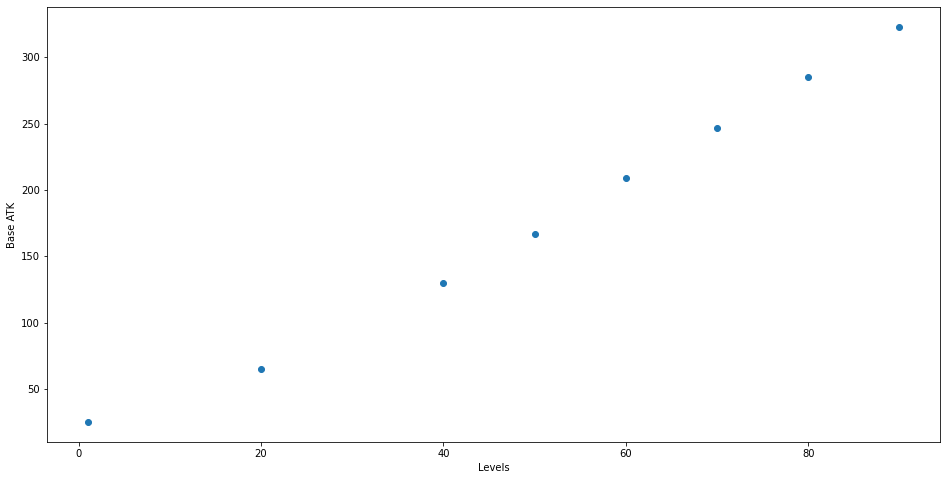

In [49]:
plt.scatter(train_df['Lv'], train_df['Base ATK'])
plt.xlabel('Levels')
plt.ylabel('Base ATK')
plt.show()

In [102]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.05))

In [103]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model.fit(train_df['Lv'], train_df['Base ATK'], epochs=600, validation_split = 0.2)

Epoch 1/600
1/1 [==============================] - 0s 342ms/step - loss: 192.0245 - val_loss: 408.7350
Epoch 2/600
1/1 [==============================] - 0s 25ms/step - loss: 189.9661 - val_loss: 404.4350
Epoch 3/600
1/1 [==============================] - 0s 26ms/step - loss: 187.9077 - val_loss: 400.1350
Epoch 4/600
1/1 [==============================] - 0s 25ms/step - loss: 185.8494 - val_loss: 395.8350
Epoch 5/600
1/1 [==============================] - 0s 23ms/step - loss: 183.7910 - val_loss: 391.5350
Epoch 6/600
1/1 [==============================] - 0s 23ms/step - loss: 181.7327 - val_loss: 387.2350
Epoch 7/600
1/1 [==============================] - 0s 23ms/step - loss: 179.6744 - val_loss: 382.9349
Epoch 8/600
1/1 [==============================] - 0s 22ms/step - loss: 177.6160 - val_loss: 378.6349
Epoch 9/600
1/1 [==============================] - 0s 21ms/step - loss: 175.5577 - val_loss: 374.3350
Epoch 10/600
1/1 [==============================] - 0s 21ms/step - loss: 173.4993

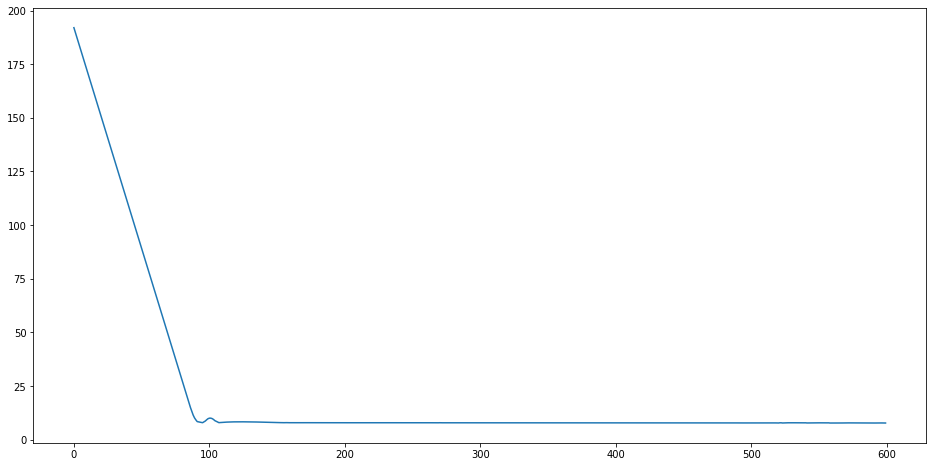

In [105]:
plt.plot(history.history['loss'])
plt.show()

In [106]:
result = {}

result['prediction'] = model.predict(test_df['Lv'])

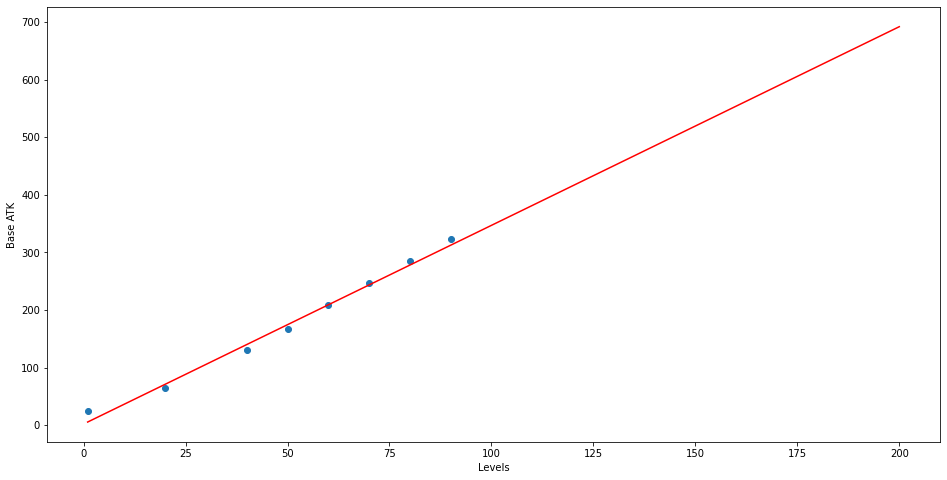

In [107]:
plt.scatter(test_df['Lv'], test_df['Base ATK'])
plt.plot(test_df['Lv'], result['prediction'], color='r')
plt.xlabel('Levels')
plt.ylabel('Base ATK')
plt.show()